In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [152]:
1.
df=pd.read_excel("flight_price.xlsx")
print(f"it contain {df.shape} rows & column" )

it contain (10683, 11) rows & column


<AxesSubplot:xlabel='Price', ylabel='Count'>

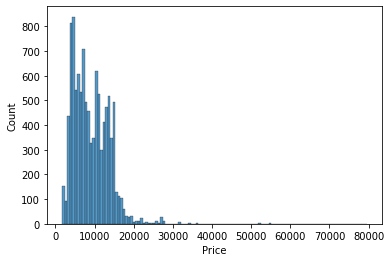

In [153]:
2.
df.head()
sns.histplot(df['Price'])
#it right skewed distribution

In [154]:
3.
print(f" thr range of price : {df['Price'].min(),df['Price'].max()}")
print(f" min : {df['Price'].min()} max:{df['Price'].max()}")


 thr range of price : (1759, 79512)
 min : 1759 max:79512


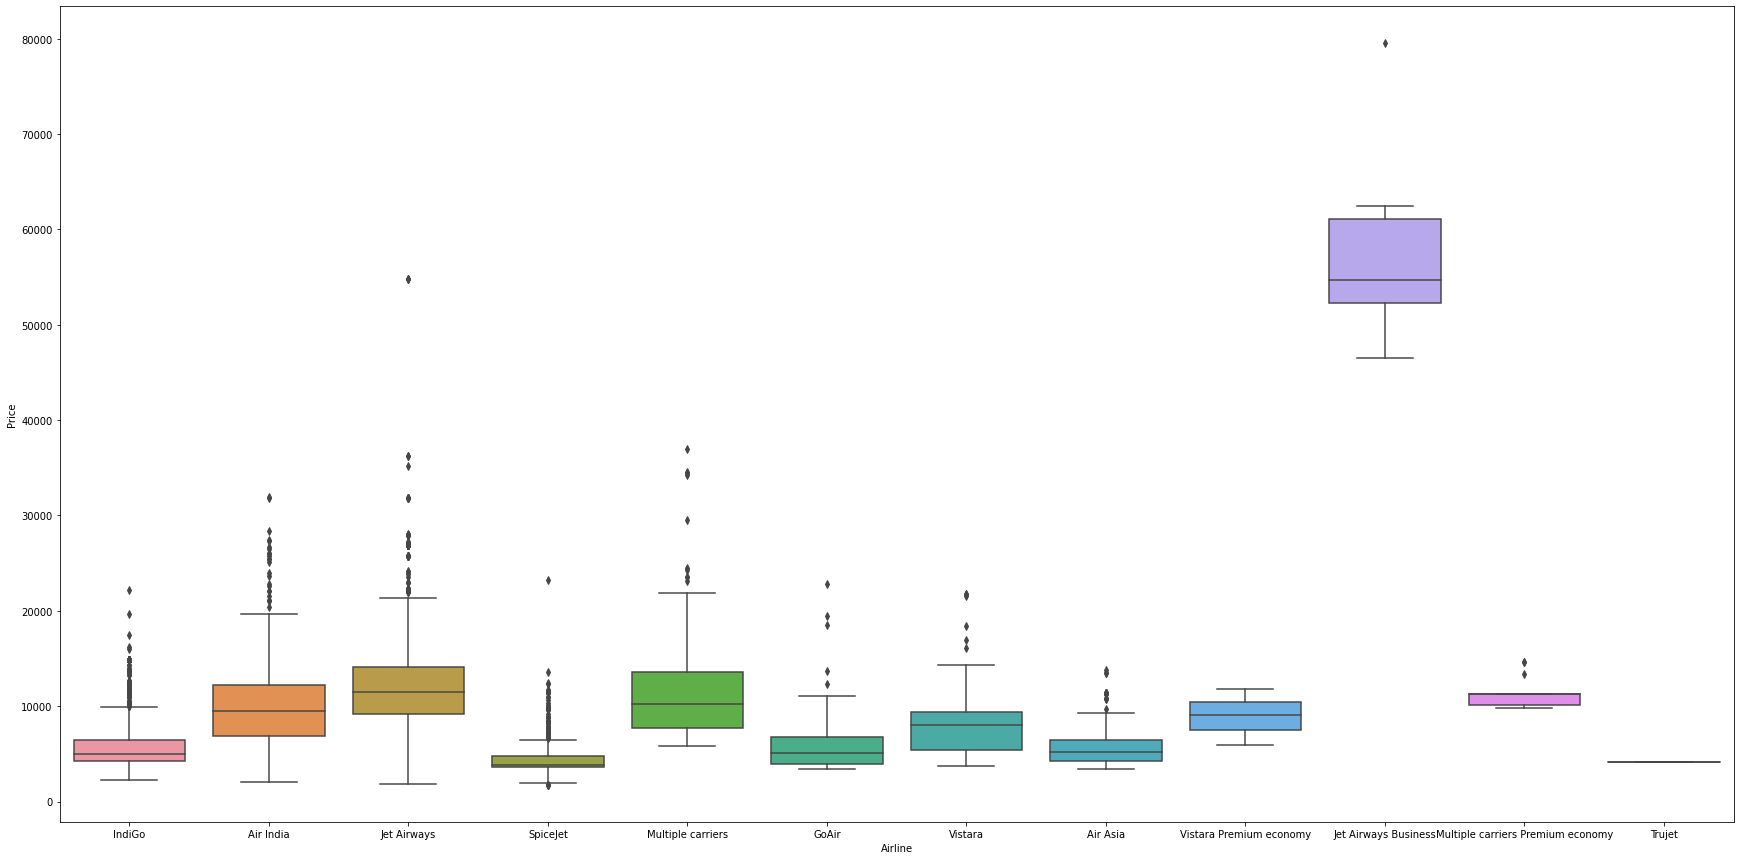

In [155]:
4. 
fig,ax=plt.subplots(figsize=(30,15))
sns.boxplot(x=df['Airline'],y=df['Price'],ax=ax)
plt.show()

In [156]:
#jet airways business  high price compared to other
# spicejet, indigo were cheaper compared

<AxesSubplot:>

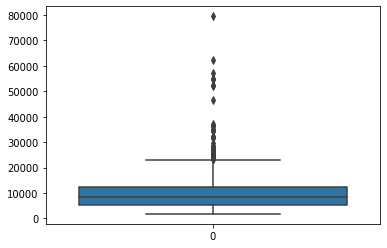

In [157]:
5.
# yes, there are many outlier in this dataset 
sns.boxplot(df['Price'])
# outlier were 8000,6500,....
# it decreases the performance of the ML, 

In [158]:
# 6.Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset  to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [159]:
df['Journey_data']=df['Date_of_Journey'].str.split("/").str[0].astype("int")
df['Journey_month']=df['Date_of_Journey'].str.split("/").str[1].astype("int")
df['Journey_year']=df['Date_of_Journey'].str.split("/").str[2].astype("int")
df.drop(["Date_of_Journey"], axis=1, inplace=True)

<AxesSubplot:xlabel='Journey_month', ylabel='Count'>

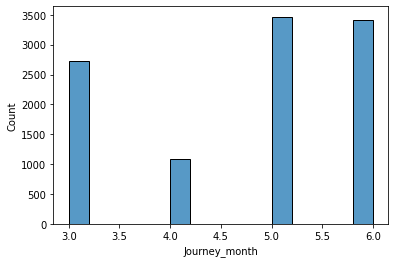

In [160]:
df.head()
df['Journey_month'].value_counts()
sns.histplot(df["Journey_month"])

In [161]:
# may, June has peak travel season


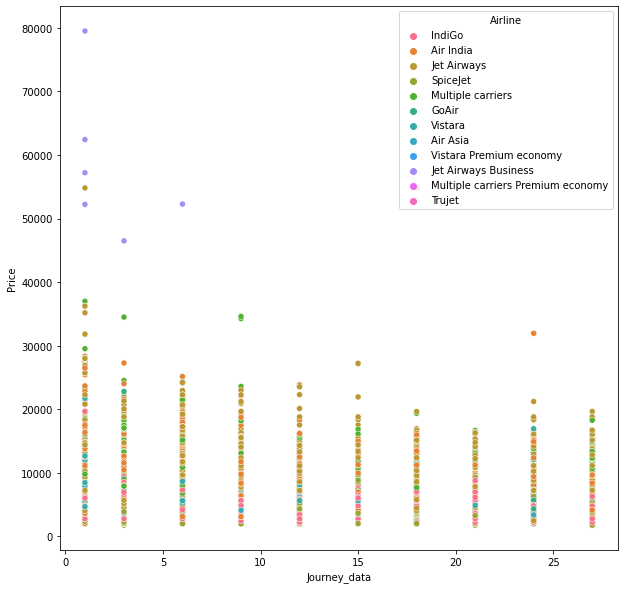

In [162]:
# 7.You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=df["Journey_data"],y=df['Price'],hue=df['Airline'])
plt.show()

##the price avg in all day in month , but in first 10 days has higher price then normal

In [163]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?
df.head()

df['Arrival_hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

In [164]:
df['Arrival_hours']=df['Arrival_hours'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)
df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration'].str.split(' ').str[1].str.split('h').str[0]
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

<AxesSubplot:>

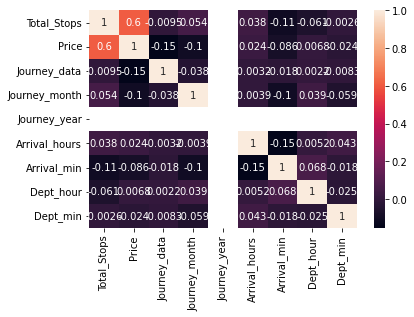

In [165]:
df.corr()
sns.heatmap(df.corr(),annot=True)


# no of stop increase , the price also increases

In [424]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [425]:
df=pd.read_csv('googleplaystore.csv')

In [426]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [427]:
df.shape

(10841, 13)

In [428]:
9. 
print(f"it coitain {df.shape} rows and columns")

it coitain (10841, 13) rows and columns


In [429]:
df=df[~df["App"].duplicated()]

In [430]:
df['Rating']=df['Rating'].astype("float")

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [432]:

df.loc[[10472],["Reviews"]]=300000

In [433]:
df['Reviews']=df.Reviews.astype(int)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   int32  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.2+ MB


In [435]:

df=df.drop(10472)

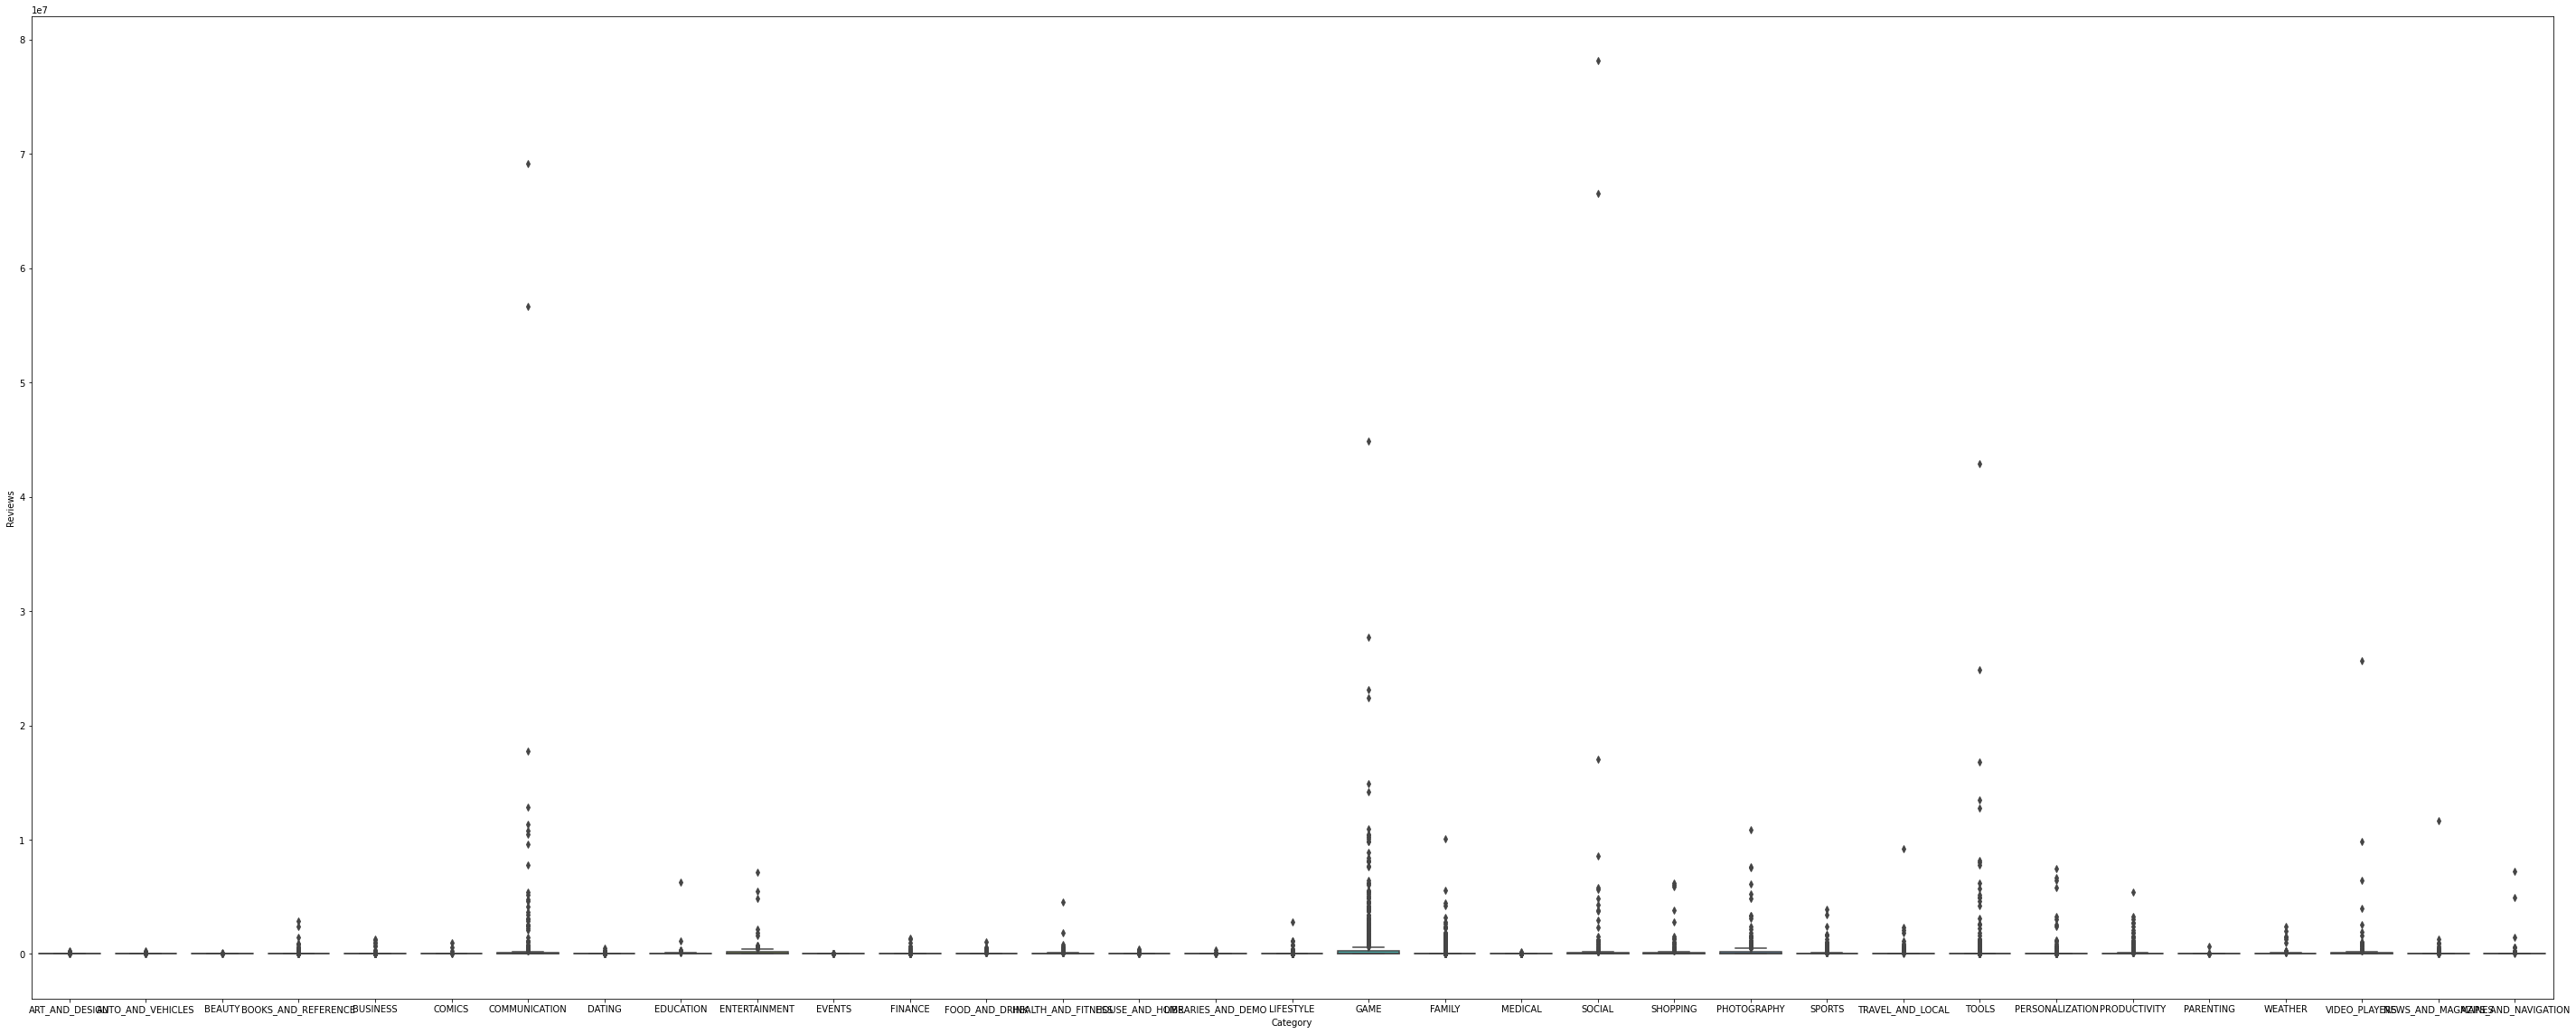

In [436]:
# 10.How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.
fig,ax=plt.subplots(figsize=(50,20))
sns.boxplot(x=df['Category'],y=df['Reviews'],ax=ax)
plt.show()

In [437]:
print("top 5 catageory ")
avg_rate=df.groupby(['Category']).mean().sort_values("Rating",ascending = False)
avg_rate

top 5 catageory 


,Rating,Reviews
Category,,
EVENTS,4.435556,2515.906250
EDUCATION,4.364407,112303.764706
ART_AND_DESIGN,4.357377,22175.046875
BOOKS_AND_REFERENCE,4.344970,75321.234234
PERSONALIZATION,4.332215,142401.808511
PARENTING,4.300000,15972.183333
BEAUTY,4.278571,7476.226415
GAME,4.247368,648903.763295
SOCIAL,4.247291,953672.807531


In [438]:
avg_rate.reset_index(inplace=True)

In [439]:
# 11.Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.
df.isnull().sum()
#there are missing values in the dataset
df[df['Rating'].isnull()]

# we fill nan value by avg of Category of Review
for i in range(len(avg_rate)):

    df[df['Category']==avg_rate['Category'][i]].replace(np.nan,avg_rate["Category"][i],inplace=True)
    


C:\Users\Akshay Kumar BM\AppData\Local\Temp\ipykernel_14720\173287215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Category']==avg_rate['Category'][i]].replace(np.nan,avg_rate["Category"][i],inplace=True)


In [440]:

# # 12.What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.
df['Size'].unique()
df['Size']=df['Size'].str.replace("M","000")
df['Size']=df['Size'].str.replace("k","")
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df["Size"].astype("float")



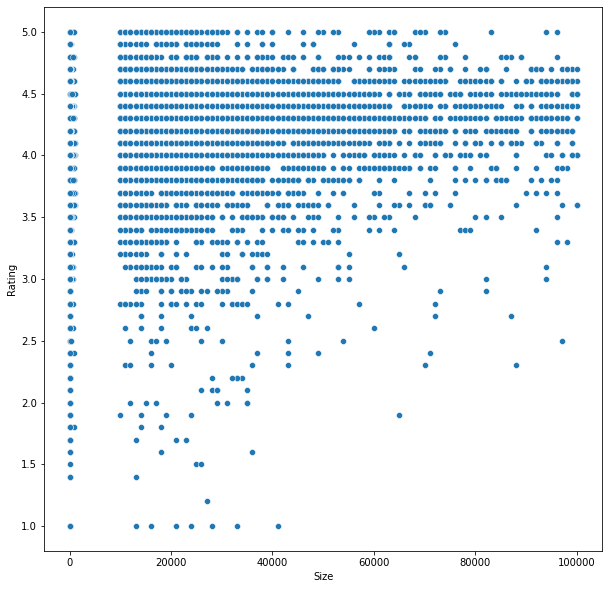

In [441]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(data=df,x="Size",y="Rating",ax=ax)
plt.show()

##ther is higher the size of app, rateing is higher

In [442]:
# 13.How does the type of app affect its price? Create a bar chart to compare average prices by app type.

df.head()
df["Price"]=df['Price'].astype("float")
plot=df.groupby(['Category']).mean().sort_values("Price",ascending = False)[0:10].reset_index()
#FINANCE,LIFESTYLE,MEDICAL,EVENTS,FAMILY has high price 
sns.barplot(x=plot["Category"],y=plot["Price"])

ValueError: could not convert string to float: '$4.99'

In [443]:
# 14.What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.
df.Installs=df["Installs"].str.replace("+","")
df.Installs=df["Installs"].str.replace(",","")
df["Installs"]=df.Installs.astype(int)
df['Installs']

C:\Users\Akshay Kumar BM\AppData\Local\Temp\ipykernel_14720\2693410557.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs=df["Installs"].str.replace("+","")


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9659, dtype: int32

In [444]:
df.shape

(9659, 13)

In [445]:
df["App"].drop_duplicates(inplace=True)

In [446]:
df.sort_values("Installs",ascending=False)[:11]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device


In [447]:
# 15. Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the  Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?
df.groupby(['Category']).sum().sort_values(by = "Installs" , ascending=False)[0:5][["Installs"]]
# based on total sum of installed

,Installs
Category,
GAME,1.387892e+10
COMMUNICATION,1.103828e+10
TOOLS,8.001772e+09
PRODUCTIVITY,5.793091e+09
SOCIAL,5.487868e+09


<AxesSubplot:xlabel='Rating', ylabel='App'>

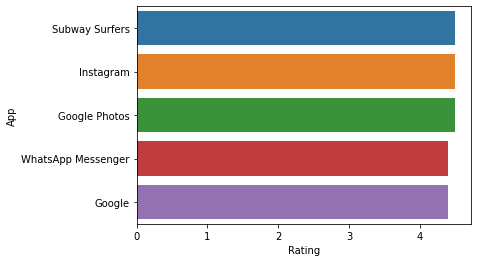

In [494]:
# 16.Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?
val=df.sort_values(by=["Installs","Rating"],ascending=False)[0:5]


sns.barplot(y=val['App'],x=val['Rating'])

In [467]:
# 17.A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?
df.head()
df['Last Updated']=pd.to_datetime(df['Last Updated'])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


<AxesSubplot:xlabel='month', ylabel='Reviews'>

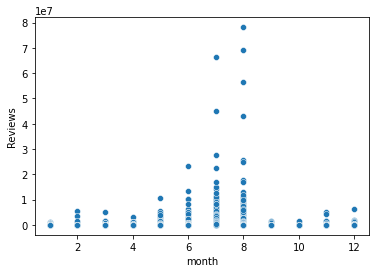

In [497]:
df.head()
sns.scatterplot(x=df['month'],y=df['Reviews'])
# in 5th & 6th month has high number of reviews